# Q2

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math

# Segmentation

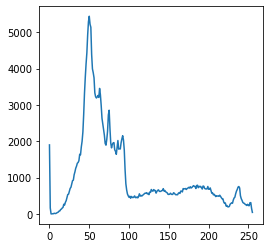

In [4]:
img = cv2.imread("hinton.jpg" , cv2.IMREAD_GRAYSCALE)
# get histogram
hist = cv2.calcHist([img] , [0] , None , [256] , [0,256])
fig = plt.figure(figsize=(4,4))
plt.plot(hist)

In [7]:
def global_thresholding(image , k):

    ## your Code here ##
    ret,thresh = cv2.threshold(image,k,255,cv2.THRESH_BINARY)
    return thresh

In [8]:
def otsu_thresholding(image):

    ## your Code here ##
    ret2,threshold = cv2.threshold(image,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

    return threshold

In [6]:
def adaptive_thresholding(image , C , blocksize):
  threshold = cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,blocksize,C)

  ## your Code here ##

  return threshold

In [32]:
print(img.shape)

(550, 485)


<Figure size 432x288 with 0 Axes>

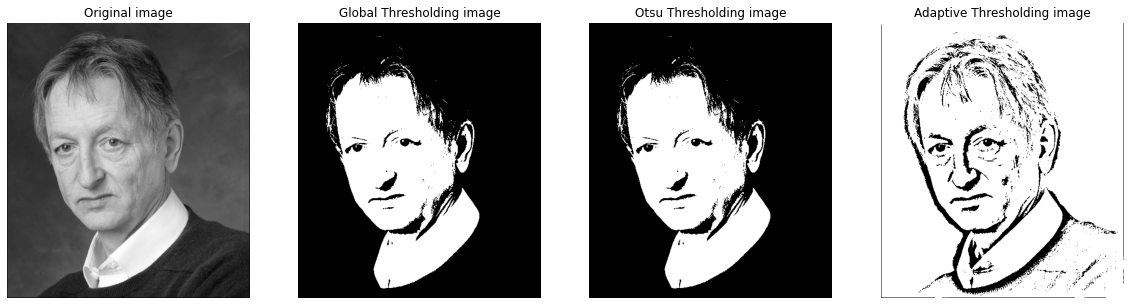

In [90]:
# run this cell #
# try a few k's from histogram of image to find best k 
k = 122
image_global = global_thresholding(img , k)
image_otsu = otsu_thresholding(img)
image_adaptive = adaptive_thresholding(img , C = 15 , blocksize = 61)

# show results here
plt.gray()
fig = plt.figure(figsize=(20,20))
cols = 4
rows = 1

fig.add_subplot(rows , cols , 1)
plt.imshow(img)
plt.axis('off')
plt.title("Original image")

fig.add_subplot(rows , cols , 2)
plt.imshow(image_global)
plt.axis('off')
plt.title("Global Thresholding image")

fig.add_subplot(rows , cols , 3)
plt.imshow(image_otsu)
plt.axis('off')
plt.title("Otsu Thresholding image")

fig.add_subplot(rows , cols , 4)
plt.imshow(image_adaptive)
plt.axis('off')
plt.title("Adaptive Thresholding image")

plt.show()

<Figure size 432x288 with 0 Axes>

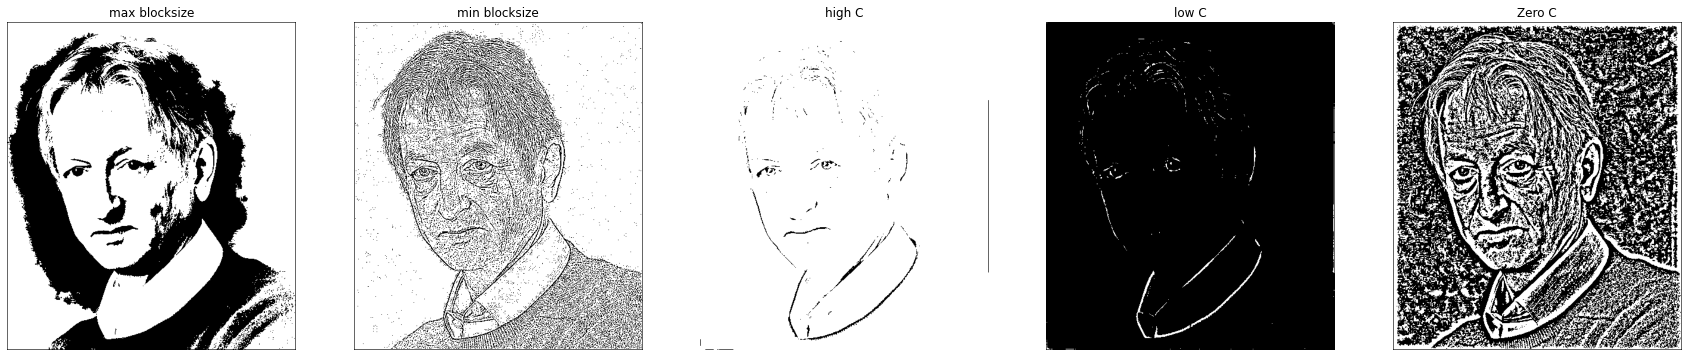

In [76]:
max_blocksize = adaptive_thresholding(img , C = 2 , blocksize = 485)
min_blocksize = adaptive_thresholding(img , C = 2 , blocksize = 3)
high_C = adaptive_thresholding(img , C = 30 , blocksize = 21)
low_C = adaptive_thresholding(img , C = -30 , blocksize = 21)
zero_C = adaptive_thresholding(img , C = 0 , blocksize = 21)
# show results here
plt.gray()
fig = plt.figure(figsize=(30,30))
cols = 5
rows = 1

fig.add_subplot(rows , cols , 1)
plt.imshow(max_blocksize)
plt.axis('off')
plt.title("max blocksize")

fig.add_subplot(rows , cols , 2)
plt.imshow(min_blocksize)
plt.axis('off')
plt.title("min blocksize")

fig.add_subplot(rows , cols , 3)
plt.imshow(high_C)
plt.axis('off')
plt.title("high C")

fig.add_subplot(rows , cols , 4)
plt.imshow(low_C)
plt.axis('off')
plt.title("low C")

fig.add_subplot(rows , cols , 5)
plt.imshow(zero_C)
plt.axis('off')
plt.title("Zero C")

plt.show()

<Figure size 432x288 with 0 Axes>

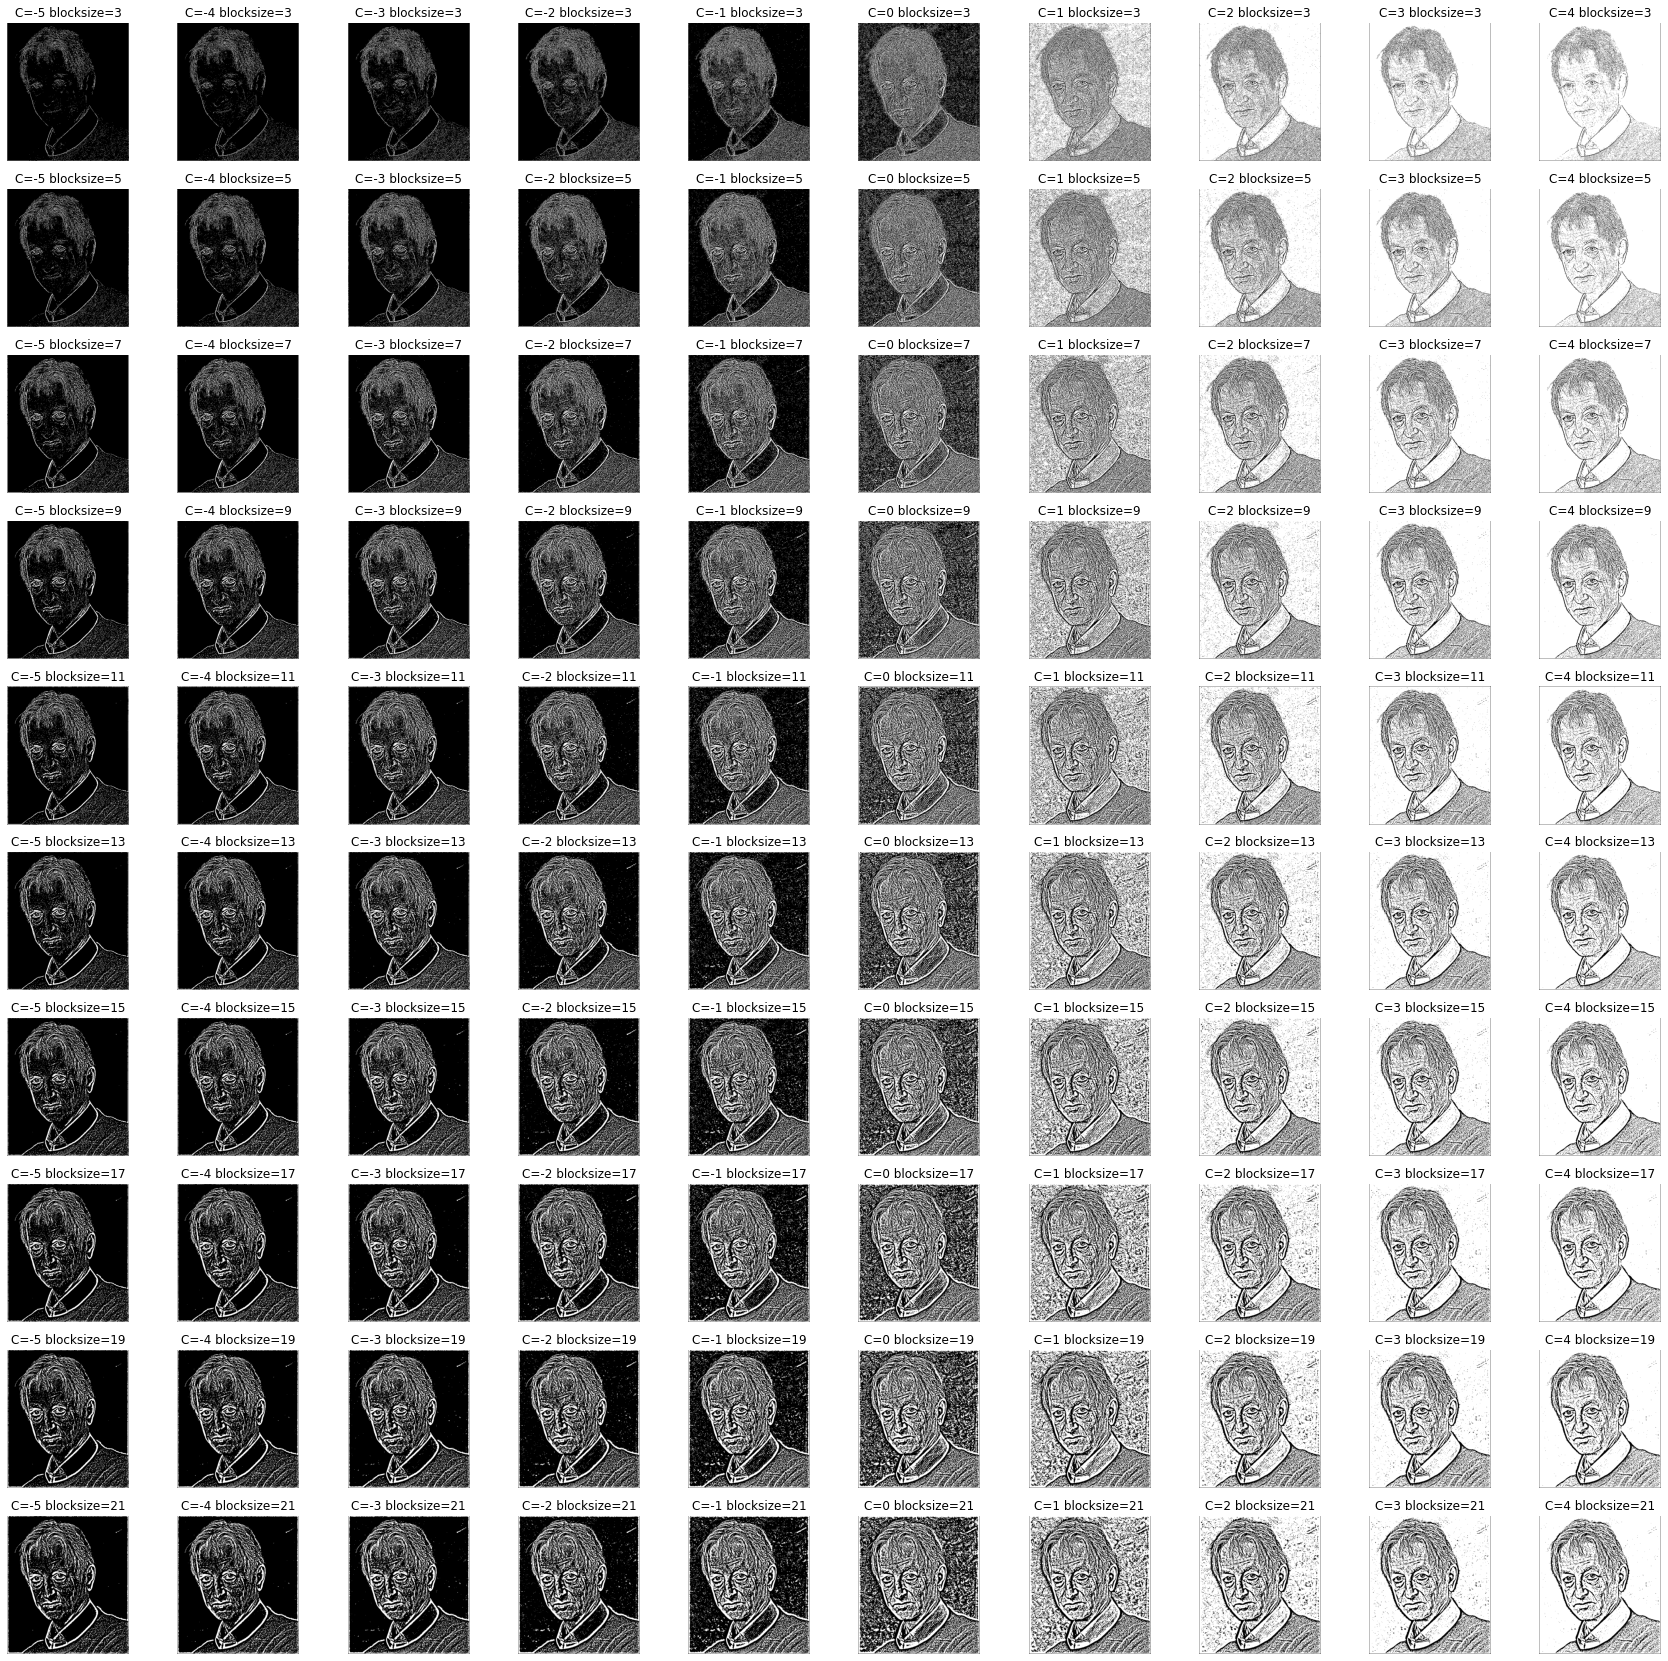

In [31]:
# run this cell #
# try a few k's from histogram of image to find best k 
# k = 122
# image_global = global_thresholding(img , k)
# image_otsu = otsu_thresholding(img)
# image_adaptive = adaptive_thresholding(img , C = 2 , blocksize = 11)

# show results here
plt.gray()
fig = plt.figure(figsize=(30,30))
cols = 10
rows = 10

for row in range(rows):
  for col in range(cols):
    image_adaptive = adaptive_thresholding(img , C = col -5 , blocksize = 2*row+3)
    fig.add_subplot(rows , cols , cols * row + col +1)
    plt.imshow(image_adaptive)
    plt.axis('off')
    plt.title('C={} blocksize={}'.format(col -5,2*row+3))

plt.show()

# Tumor Extraction

Text(0.5, 1.0, 'Result on MRI')

<Figure size 432x288 with 0 Axes>

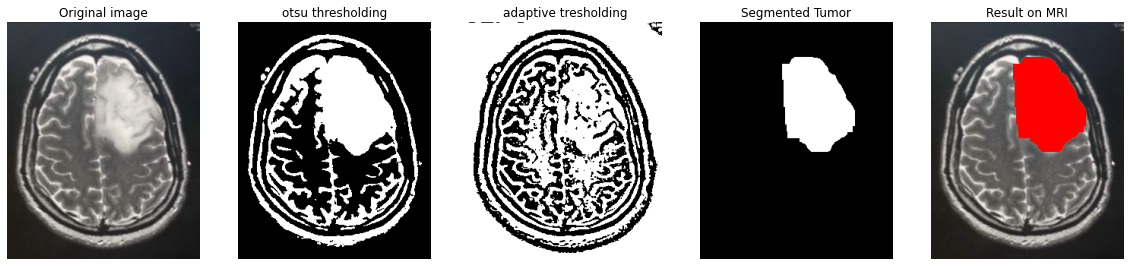

In [67]:
## Your code here ##
#Start#
brain = cv2.imread("brain.jpg")
# brain = cv2.cvtColor(brain ,cv2.COLOR_BGR2RGB)
gray_brain = cv2.cvtColor(brain, cv2.COLOR_RGB2GRAY)
brain_otsu = otsu_thresholding(gray_brain)
brain_adaptive = adaptive_thresholding(gray_brain , C = 5 , blocksize = 21)
kernel = np.ones((21,21))
tumor = cv2.morphologyEx(brain_otsu, cv2.MORPH_OPEN, kernel)
painted_MRI = brain.copy() 
painted_MRI[tumor==255] = (255,0,0)
#End#


# show Per Step result if needed #
plt.gray()
fig = plt.figure(figsize=(20,20))
cols = 5
rows = 1

fig.add_subplot(rows , cols , 1)
plt.imshow(brain)
plt.axis('off')
plt.title("Original image")

fig.add_subplot(rows , cols , 2)
plt.imshow(brain_otsu)
plt.axis('off')
plt.title("otsu thresholding")

fig.add_subplot(rows , cols , 3)
plt.imshow(brain_adaptive)
plt.axis('off')
plt.title("adaptive tresholding")

fig.add_subplot(rows , cols , 4)
plt.imshow(tumor)
plt.axis('off')
plt.title("Segmented Tumor")

fig.add_subplot(rows , cols , 5)
plt.imshow(painted_MRI)
plt.axis('off')
plt.title("Result on MRI")